In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
#from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate, AveragePooling2D
import cv2
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#from keras.models import Sequential
#from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
#from keras.preprocessing.image import ImageDataGenerator
#from keras.models import load_model
from sklearn.cluster import KMeans
import imutils
from skimage.feature import hog
import glob
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
root_path = 'D:\\CS231\\FinalProject'
root_list = os.listdir(root_path)
train_path = os.path.join(root_path, 'train')
test_path = os.path.join(root_path, 'test')

In [3]:
X_train = []
y_train = []
X_test = []
y_test = []

In [4]:
for index, image_dir in enumerate(os.listdir(train_path)):
    label = index
    image_dir_path = os.path.join(train_path, image_dir)  
    image_paths = glob.glob(os.path.join(image_dir_path, "*.jpg"))  
    
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            img_GRAY = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img_GRAY = cv2.resize(img_GRAY,(128,128))
          
            hog_feature, hog_image = hog(img_GRAY, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=True)
            
            X_train.append(hog_feature)
            y_train.append(label)

for index, image_dir in enumerate(os.listdir(test_path)):
    label = index
    image_dir_path = os.path.join(test_path, image_dir)  
    image_paths = glob.glob(os.path.join(image_dir_path, "*.jpg")) 
    
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            img_GRAY = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img_GRAY = cv2.resize(img_GRAY,(128,128))
            
            hog_feature, hog_image = hog(img_GRAY, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=True)
            
            X_test.append(hog_feature)
            y_test.append(label)

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}


Mean Accuracy: 0.08370144706778371
Parameters: {'C': 0.01, 'gamma':

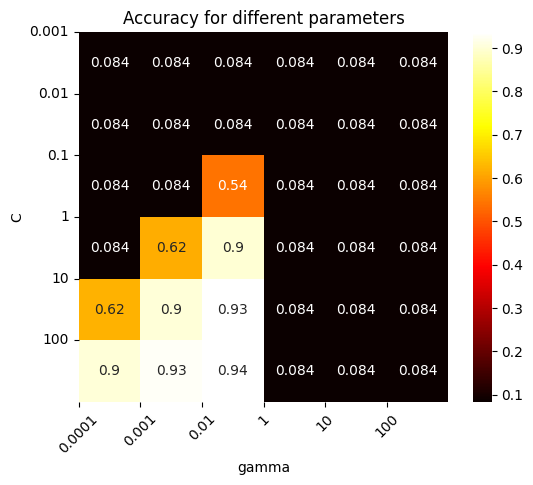

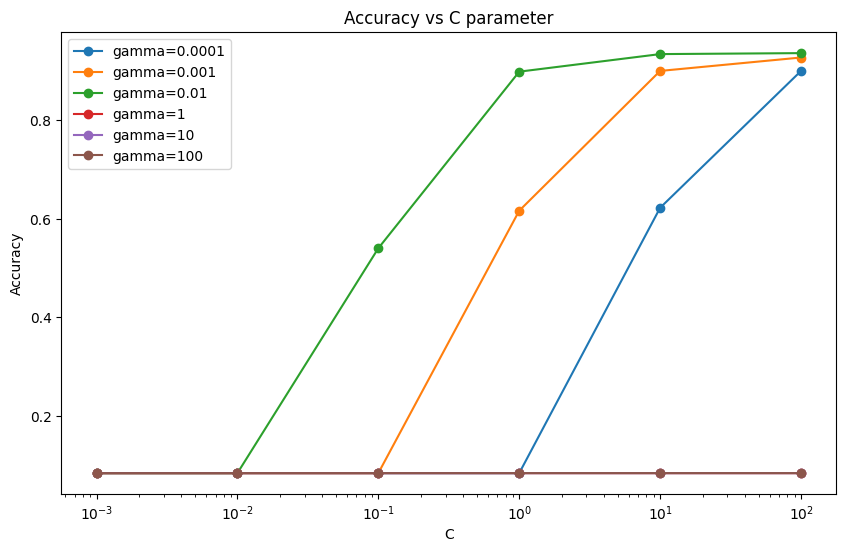

In [6]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma':[0.0001, 0.001, 0.01, 1, 10, 100] 
}

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

grid_search = GridSearchCV(svm_classifier, param_grid, cv=kf)

grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean Accuracy:", mean_score)
    print("Parameters:", params)
    print("\n")

best_params1 = grid_search.best_params_
print("Best parameters:", best_params1)

best_model1 = grid_search.best_estimator_
y_pred = best_model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report for Best Model:\n", report)

scores = grid_search.cv_results_["mean_test_score"].reshape(
    len(param_grid['gamma']),
    len(param_grid['C']))

sns.heatmap(scores, 
            cmap = plt.cm.hot,
            annot= True, 
            cbar= True, 
            square=True)
 
plt.xlabel("gamma")
plt.ylabel("C")
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'], rotation=0)
 
plt.title("Accuracy for different parameters")
plt.show()
 
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs C parameter")
plt.xlabel("C")
plt.ylabel("Accuracy")
n = len(param_grid['C'])
for i in range(n):
    plt.plot(param_grid['C'], 
             scores[:,i], 
             'o-', label='gamma='+str(param_grid['gamma'][i]))
 
plt.legend()
plt.xscale('log')
plt.show()

In [7]:
import joblib
joblib.dump(best_model1, 'SVM_RBF_HOG.pkl')

['SVM_RBF_HOG.pkl']